In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
import seaborn as sns
%matplotlib inline
import os
import warnings
from plotly.subplots import make_subplots
import pickle
import plotly.graph_objects as go
import plotly.express as px 
from sklearn.svm import SVC
from sklearn import tree
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
Data = pd.read_csv(r'/content/gdrive/My Drive/Colab Notebooks/economygrowth.csv')

In [5]:
display(pd.DataFrame(Data))

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Pakistan,PAK,2018,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.035076
1,Pakistan,PAK,2017,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.430694
2,Pakistan,PAK,2016,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.099502
3,Pakistan,PAK,2015,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.434732
4,Pakistan,PAK,2014,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.847499
...,...,...,...,...,...,...
11340,Pakistan,PAK,1974,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,1.001784
11341,Pakistan,PAK,1973,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,1.303659
11342,Pakistan,PAK,1972,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.812347
11343,Pakistan,PAK,1971,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.559546


#	Description of dataset through commands of summary 

In [6]:
Data.describe()

,Year,Value
count,11345.000000,1.134500e+04
mean,1993.113706,4.436613e+11
std,15.510374,2.235883e+12
min,1960.000000,-3.752710e+12
25%,1981.000000,1.201039e+01
50%,1994.000000,1.866489e+08
75%,2006.000000,3.023784e+10
max,2018.000000,3.814920e+13


In [7]:
Data.describe(include=['object'])

,Country Name,Country ISO3,Indicator Name,Indicator Code
count,11345,11345,11345,11345
unique,1,1,246,246
top,Pakistan,PAK,External balance on goods and services (consta...,NE.RSB.GNFS.KN
freq,11345,11345,59,59


In [8]:
Data['Country ISO3'].value_counts().to_frame()

,Country ISO3
PAK,11345


In [9]:
Data['Country Name'].value_counts().to_frame()

,Country Name
Pakistan,11345


In [10]:
Data['Indicator Name'].value_counts().to_frame()

,Indicator Name
External balance on goods and services (constant LCU),59
"Manufacturing, value added (constant LCU)",59
Gross value added at basic prices (GVA) (current LCU),59
Gross value added at basic prices (GVA) (current US$),59
GDP deflator (base year varies by country),59
...,...
"2005 PPP conversion factor, GDP (LCU per international $)",1
"Present value of external debt (% of exports of goods, services and primary income)",1
"2005 PPP conversion factor, private consumption (LCU per international $)",1
Present value of external debt (current US$),1


In [11]:
Data['Indicator Code'].value_counts().to_frame()

,Indicator Code
NE.RSB.GNFS.KN,59
NV.IND.MANF.KN,59
NY.GDP.FCST.CN,59
NY.GDP.FCST.CD,59
NY.GDP.DEFL.ZS,59
...,...
PA.NUS.PPP.05,1
DT.DOD.PVLX.EX.ZS,1
PA.NUS.PRVT.PP.05,1
DT.DOD.PVLX.CD,1


In [12]:
Data['Value'].value_counts().to_frame()

,Value
0.000000e+00,51
4.762000e+00,12
9.900000e+00,8
2.500000e+07,5
1.300000e+00,4
...,...
6.591380e+12,1
6.547720e+12,1
6.427690e+12,1
6.253740e+12,1


In [13]:
Data['Year'].value_counts().to_frame()

,Year
2006,240
1996,238
2001,238
2005,237
1991,236
1990,236
2009,235
1993,235
2007,235
2004,235


#	Randomly miss 3 to 4 columns values almost 25 % 

In [14]:
df = pd.DataFrame(Data)

In [15]:
for col in df.columns:
  df.loc[df.sample(frac=0.25).index,col] = np.nan

In [16]:
df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Pakistan,PAK,NaN,Trade in services (% of GDP),NaN,5.035076
1,NaN,PAK,2017.0,NaN,BG.GSR.NFSV.GD.ZS,5.430694
2,Pakistan,NaN,NaN,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.099502
3,NaN,PAK,2015.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.434732
4,Pakistan,PAK,2014.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.847499
...,...,...,...,...,...,...
11340,NaN,PAK,NaN,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,NaN
11341,NaN,PAK,NaN,Interest payments on external debt (% of GNI),NaN,1.303659
11342,NaN,PAK,1972.0,Interest payments on external debt (% of GNI),NaN,0.812347
11343,Pakistan,PAK,NaN,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,NaN


#Explore data through various plotting to check missing values and noisy data
# And Use fill method against the missing value with some imputation

<Figure size 720x432 with 0 Axes>

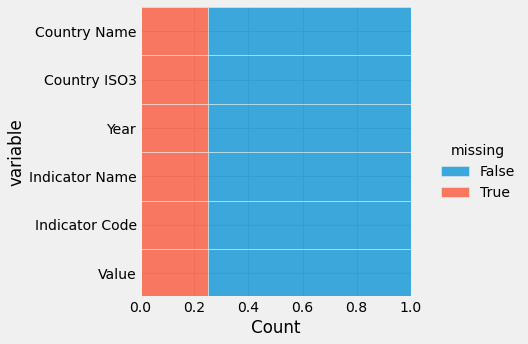

In [17]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

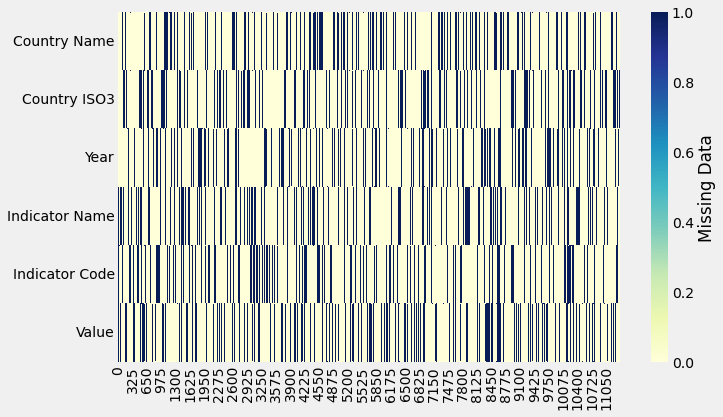

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [19]:
df['Country Name'].isnull().to_frame()

,Country Name
0,False
1,True
2,False
3,True
4,False
...,...
11340,True
11341,True
11342,True
11343,False


In [20]:
df['Country ISO3'].isnull().to_frame()

,Country ISO3
0,False
1,False
2,True
3,False
4,False
...,...
11340,False
11341,False
11342,False
11343,False


In [21]:
df['Year'].isnull().to_frame()

,Year
0,True
1,False
2,True
3,False
4,False
...,...
11340,True
11341,True
11342,False
11343,True


In [22]:
df['Indicator Name'].isnull().to_frame()

,Indicator Name
0,False
1,True
2,False
3,False
4,False
...,...
11340,False
11341,False
11342,False
11343,False


In [23]:
df['Indicator Code'].isnull().to_frame()

,Indicator Code
0,True
1,False
2,False
3,False
4,False
...,...
11340,False
11341,True
11342,True
11343,False


In [24]:
df['Value'].isnull().to_frame()

,Value
0,False
1,False
2,False
3,False
4,False
...,...
11340,True
11341,False
11342,False
11343,True


In [25]:
df.fillna(method="ffill", limit = 5,inplace=True)
df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Pakistan,PAK,NaN,Trade in services (% of GDP),NaN,5.035076
1,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.430694
2,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.099502
3,Pakistan,PAK,2015.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.434732
4,Pakistan,PAK,2014.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.847499
...,...,...,...,...,...,...
11340,Pakistan,PAK,1975.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,1.061369
11341,Pakistan,PAK,1975.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,1.303659
11342,Pakistan,PAK,1972.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.812347
11343,Pakistan,PAK,1972.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.812347


In [26]:
df.fillna(method="bfill", limit = 5,inplace=True)
df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.035076
1,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.430694
2,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.099502
3,Pakistan,PAK,2015.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.434732
4,Pakistan,PAK,2014.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.847499
...,...,...,...,...,...,...
11340,Pakistan,PAK,1975.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,1.061369
11341,Pakistan,PAK,1975.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,1.303659
11342,Pakistan,PAK,1972.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.812347
11343,Pakistan,PAK,1972.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.812347


In [27]:
df['Value'].isnull().value_counts().to_frame()

,Value
False,11345


In [28]:
df['Indicator Code'].isnull().value_counts().to_frame()

,Indicator Code
False,11345


In [29]:
df['Indicator Name'].isnull().value_counts().to_frame()

,Indicator Name
False,11345


In [30]:
df['Year'].isnull().value_counts().to_frame()

,Year
False,11345


In [31]:
df['Country ISO3'].isnull().value_counts().to_frame()

,Country ISO3
False,11345


In [32]:
df['Country Name'].isnull().value_counts().to_frame()

,Country Name
False,11345


In [33]:
df.drop_duplicates()
df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.035076
1,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.430694
2,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.099502
3,Pakistan,PAK,2015.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.434732
4,Pakistan,PAK,2014.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.847499
...,...,...,...,...,...,...
11340,Pakistan,PAK,1975.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,1.061369
11341,Pakistan,PAK,1975.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,1.303659
11342,Pakistan,PAK,1972.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.812347
11343,Pakistan,PAK,1972.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.812347


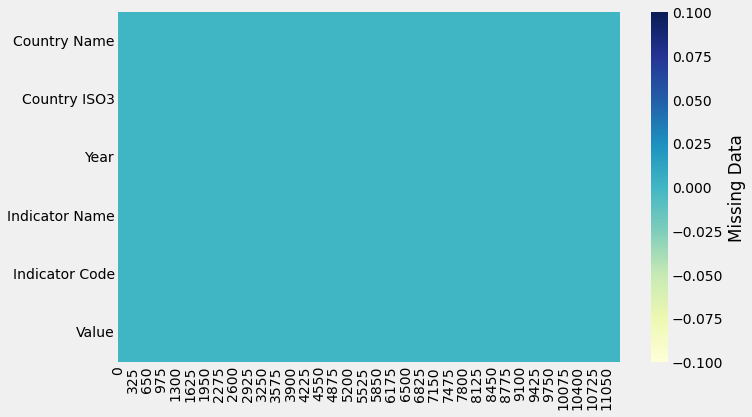

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<Figure size 720x432 with 0 Axes>

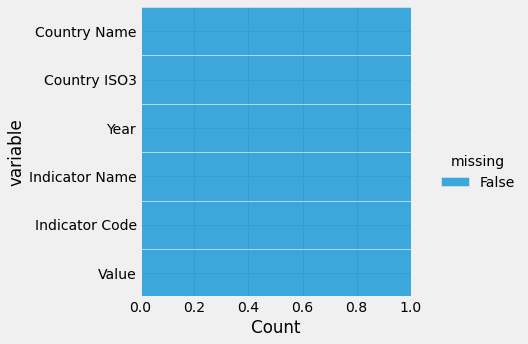

In [35]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

# Use 3 to 4 methods of numpy

In [36]:
df

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.035076
1,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.430694
2,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.099502
3,Pakistan,PAK,2015.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.434732
4,Pakistan,PAK,2014.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.847499
...,...,...,...,...,...,...
11340,Pakistan,PAK,1975.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,1.061369
11341,Pakistan,PAK,1975.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,1.303659
11342,Pakistan,PAK,1972.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.812347
11343,Pakistan,PAK,1972.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.812347


In [37]:
x = np.array(df)

x.shape

(11345, 6)

In [38]:
x = np.array(df)

x.itemsize

8

In [39]:
x = np.array(df)

x.base is None

True

# Use 5 different methods of pandas on features 

In [40]:
df.rename(columns = {'Country Name':'Country_Name', 'Country ISO3':'Country_ISO3', 'Indicator Name':'Indicator_Name', 'Indicator Code':'Indicator_Code'}, inplace = True)

In [41]:
df.head(10)

,Country_Name,Country_ISO3,Year,Indicator_Name,Indicator_Code,Value
0,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.035076
1,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.430694
2,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.099502
3,Pakistan,PAK,2015.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.434732
4,Pakistan,PAK,2014.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.847499
5,Pakistan,PAK,2013.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.570919
6,Pakistan,PAK,2012.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,6.729101
7,Pakistan,PAK,2012.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,6.208699
8,Pakistan,PAK,2010.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,6.208699
9,Pakistan,PAK,2009.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,6.287395


In [42]:
df = df.loc[(df.Country_Name=="Pakistan") & (df.Year>2014.0)]
df

,Country_Name,Country_ISO3,Year,Indicator_Name,Indicator_Code,Value
0,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.035076
1,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.430694
2,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.099502
3,Pakistan,PAK,2015.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.434732
43,Pakistan,PAK,2018.0,Trade in services (% of GDP),BM.GSR.CMCP.ZS,10.340954
...,...,...,...,...,...,...
11254,Pakistan,PAK,2017.0,Interest payments on external debt (% of expor...,DT.INT.DECT.EX.ZS,6.383223
11255,Pakistan,PAK,2017.0,Interest payments on external debt (% of expor...,DT.INT.DECT.EX.ZS,6.383223
11256,Pakistan,PAK,2017.0,Interest payments on external debt (% of expor...,DT.INT.DECT.EX.ZS,3.830829
11298,Pakistan,PAK,2016.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.456534


In [43]:
df.Country_ISO3.unique()

array(['PAK'], dtype=object)

In [44]:
df.memory_usage(deep=True)

Index              7288
Country_Name      59215
Country_ISO3      54660
Year               7288
Indicator_Name    94564
Indicator_Code    65498
Value              7288
dtype: int64

In [45]:
df.Country_ISO3.value_counts()

PAK    911
Name: Country_ISO3, dtype: int64

In [46]:
df

,Country_Name,Country_ISO3,Year,Indicator_Name,Indicator_Code,Value
0,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.035076
1,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.430694
2,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.099502
3,Pakistan,PAK,2015.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.434732
43,Pakistan,PAK,2018.0,Trade in services (% of GDP),BM.GSR.CMCP.ZS,10.340954
...,...,...,...,...,...,...
11254,Pakistan,PAK,2017.0,Interest payments on external debt (% of expor...,DT.INT.DECT.EX.ZS,6.383223
11255,Pakistan,PAK,2017.0,Interest payments on external debt (% of expor...,DT.INT.DECT.EX.ZS,6.383223
11256,Pakistan,PAK,2017.0,Interest payments on external debt (% of expor...,DT.INT.DECT.EX.ZS,3.830829
11298,Pakistan,PAK,2016.0,Interest payments on external debt (% of GNI),DT.INT.DECT.GN.ZS,0.456534


#Use 5 different plotting through matplotlib on various features 

In [47]:
value = Data.Value
value

0        5.035076
1        5.430694
2        5.099502
3        5.434732
4        5.847499
           ...   
11340    1.001784
11341    1.303659
11342    0.812347
11343    0.559546
11344    0.793699
Name: Value, Length: 11345, dtype: float64

In [48]:
year = Data.Year
year

0        2018
1        2017
2        2016
3        2015
4        2014
         ... 
11340    1974
11341    1973
11342    1972
11343    1971
11344    1970
Name: Year, Length: 11345, dtype: int64

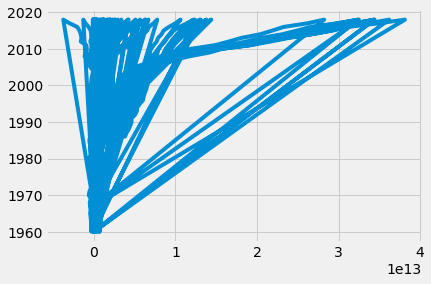

In [49]:
plt.plot(value, year)

In [50]:
indicatorcode = df.Indicator_Code
indicatorcode

0        BG.GSR.NFSV.GD.ZS
1        BG.GSR.NFSV.GD.ZS
2        BG.GSR.NFSV.GD.ZS
3        BG.GSR.NFSV.GD.ZS
43          BM.GSR.CMCP.ZS
               ...        
11254    DT.INT.DECT.EX.ZS
11255    DT.INT.DECT.EX.ZS
11256    DT.INT.DECT.EX.ZS
11298    DT.INT.DECT.GN.ZS
11299    DT.INT.DECT.GN.ZS
Name: Indicator_Code, Length: 911, dtype: object

In [51]:
indicatorname = df.Indicator_Name
indicatorname

0                             Trade in services (% of GDP)
1                             Trade in services (% of GDP)
2                             Trade in services (% of GDP)
3                             Trade in services (% of GDP)
43                            Trade in services (% of GDP)
                               ...                        
11254    Interest payments on external debt (% of expor...
11255    Interest payments on external debt (% of expor...
11256    Interest payments on external debt (% of expor...
11298        Interest payments on external debt (% of GNI)
11299        Interest payments on external debt (% of GNI)
Name: Indicator_Name, Length: 911, dtype: object

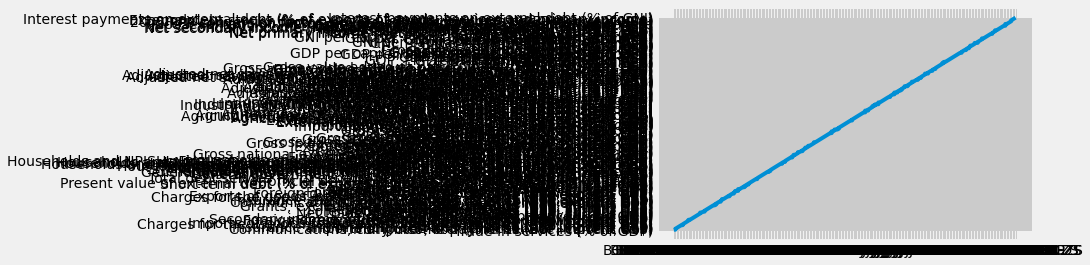

In [52]:
plt.plot(indicatorcode, indicatorname)

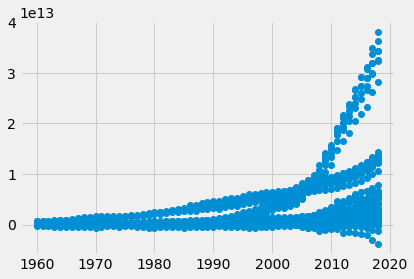

In [53]:
year = Data.Year
value = Data.Value

plt.plot(year, value, 'o')
plt.show()

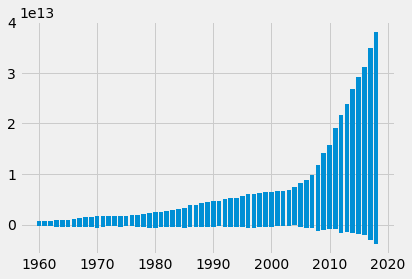

In [54]:
year = Data.Year
value = Data.Value

plt.bar(year,value)
plt.show()

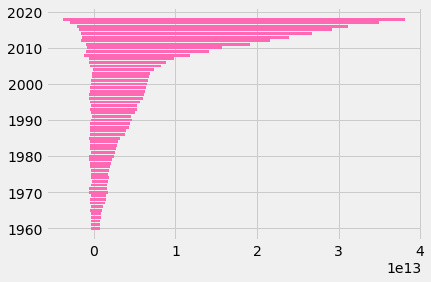

In [55]:
x = Data.Year
y = Data.Value

plt.barh(x, y,color = "hotpink")
plt.show()

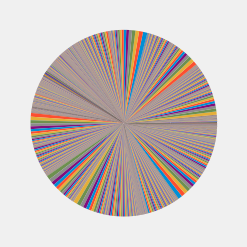

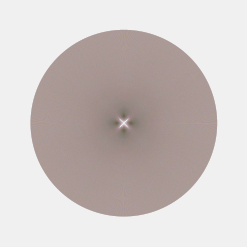

In [56]:
y = Data.Value
plt.pie(y)
plt.show()

x = Data.Year
plt.pie(x)
plt.show()

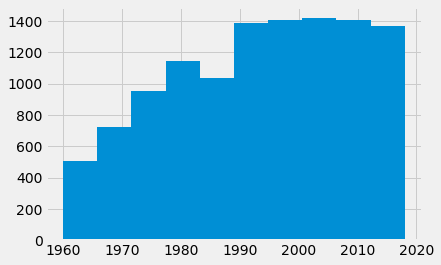

In [57]:
x = Data.Year
plt.hist(x)
plt.show()

#	Use 5 different plotting through Seaborn on various features 

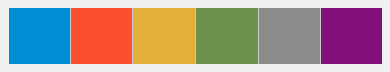

In [58]:
current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.show()

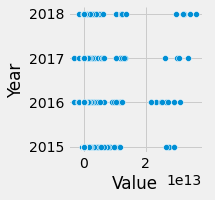

In [59]:
import seaborn
graph = seaborn.FacetGrid(df)
graph.map(plt.scatter, "Value", "Year", edgecolor ="w").add_legend()
plt.show()
  

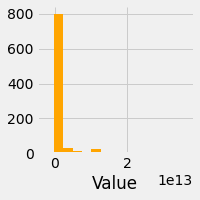

In [60]:
import seaborn
graph = seaborn.FacetGrid(df)
graph.map(plt.hist, 'Value', bins = 15, color ='orange')
plt.show()
  

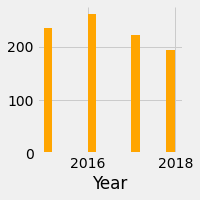

In [61]:
import seaborn
graph = seaborn.FacetGrid(df)
graph.map(plt.hist, 'Year', bins = 15, color ='orange')
plt.show()

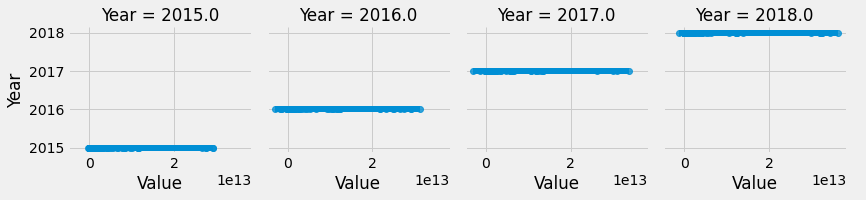

In [62]:
import seaborn
graph = seaborn.FacetGrid(df, col ='Year')
graph.map(seaborn.regplot, "Value", "Year").add_legend()
plt.show()

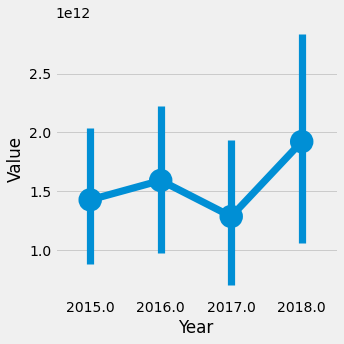

In [63]:
sns.factorplot(x ='Year', y ='Value', data = df)
plt.show()

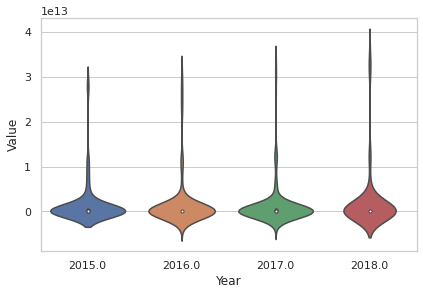

In [64]:
import seaborn
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ="Year",y ="Value",data = df)

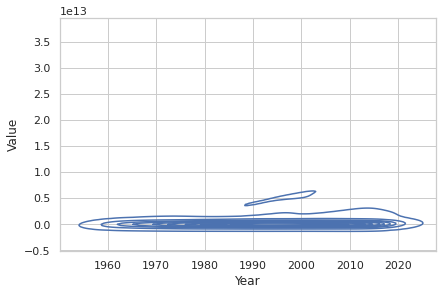

In [65]:
x = Data.Year
y = Data.Value
sns.kdeplot(x,y)

#	i. Apply 08 different machine learning models in case of classification problem (decision tree, random forest, KNN, boosting models, Ensemble models, ANN, SVM, Logistic regression, etc) in case of regression apply (linear, multiple regression, decision tree regressor, random forest regressor, SVM regressor) 

#	ii. Plot confusion matrix and classification reports, ROC AUC 

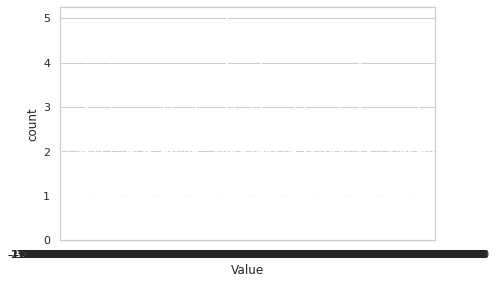

In [66]:
sns.countplot(data=df,x='Value')

In [67]:
df.head()

,Country_Name,Country_ISO3,Year,Indicator_Name,Indicator_Code,Value
0,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.035076
1,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.430694
2,Pakistan,PAK,2017.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.099502
3,Pakistan,PAK,2015.0,Trade in services (% of GDP),BG.GSR.NFSV.GD.ZS,5.434732
43,Pakistan,PAK,2018.0,Trade in services (% of GDP),BM.GSR.CMCP.ZS,10.340954


In [68]:
df2 = df.copy()

In [69]:
le = LabelEncoder()
df.Indicator_Name = le.fit_transform(df.Indicator_Name)
df.Indicator_Code = le.fit_transform(df.Indicator_Code)
df.Country_Name = le.fit_transform(df.Country_Name)
df.Country_ISO3 = le.fit_transform(df.Country_ISO3)

In [70]:
def get_encoder_inst(feature_col):
  
    assert isinstance(feature_col, pd.Series)
    feature_vec = feature_col.sort_values().values.reshape(-1, 1)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(feature_vec) 
  
    filename = '.pickle'
    pickle.dump(enc, open(filename, 'wb'))
    return enc

def get_one_hot_enc(feature_col, enc,cols):
  
    assert isinstance(feature_col, pd.Series)
    assert isinstance(enc, OneHotEncoder)
    unseen_vec = feature_col.values.reshape(-1, 1)
    encoded_vec = enc.transform(unseen_vec).toarray()
    column_name = enc.get_feature_names([cols])
    encoded_df = pd.DataFrame(encoded_vec, columns= column_name)
    return encoded_df

In [71]:
ohe_cat_list = ['Country_Name','Country_ISO3','Indicator_Name','Indicator_Code']
ohe_cat_data = df[ohe_cat_list]
df.drop(ohe_cat_list,axis=1,inplace=True)

In [72]:
data_list = []
for cols in ohe_cat_data.columns:
    encoder = get_encoder_inst(ohe_cat_data[cols])
    one = get_one_hot_enc(ohe_cat_data[cols],encoder,cols)
    data_list.append(one)
    
final_ohe = pd.concat(data_list,axis=1)
df.reset_index(drop=True, inplace=True)
final_ohe.reset_index(drop=True, inplace=True)
for cols in final_ohe.columns:
    final_ohe[cols] = final_ohe[cols].astype('int')

In [73]:
df = pd.concat([df,final_ohe],axis=1)

In [74]:
X = df.drop(['Year'], axis=1)
y = df[['Year']]

In [75]:
KF = KFold(n_splits=3,shuffle=True)
for train_index, test_index in KF.split(X):
    x_train, x_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

In [76]:
print("Train data shape:{}".format(x_train.shape))
print("Test data shape:{}".format(x_test.shape))

Train data shape:(608, 474)
Test data shape:(303, 474)


In [77]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test)

In [78]:
dt = DecisionTreeClassifier()

In [79]:
dt.fit(scaled_train,y_train)

DecisionTreeClassifier()

In [80]:
pred = dt.predict(scaled_test)

In [81]:
accuracy_score(y_test,pred)

0.2838283828382838

In [82]:
param_grid = {'criterion': ['gini', 'entropy'], 
              'splitter': ['best', 'random'], 
              'max_depth': [2,4,6,8,10,None], 
              'min_samples_split': [2,5,10,.03,.05], 
              'min_samples_leaf': [1,5,10,.03,.05], 
              'max_features': [None, 'auto'],
              'random_state': [0] 
             }

In [83]:
tune_model = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid=param_grid, 
                          scoring = 'roc_auc',
                          cv = 5,
                          verbose=0)
tune_model.fit(scaled_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [1, 5, 10, 0.03, 0.05],
                         'min_samples_split': [2, 5, 10, 0.03, 0.05],
                         'random_state': [0], 'splitter': ['best', 'random']},
             scoring='roc_auc')

In [84]:
print('\033[1m'+'Decision Tree Parameters:{} '.format(tune_model.best_params_))

Decision Tree Parameters:{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'} 


In [85]:
dt_tuned =  DecisionTreeClassifier(criterion='gini',
                                   min_samples_split=0.03,
                                   max_depth=None,
                                   max_features = None,
                                   min_samples_leaf=10,
                                   random_state = 0,
                                   splitter='random')

dt_tuned.fit(scaled_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=0.03,
                       random_state=0, splitter='random')

In [86]:
pred = dt_tuned.predict(scaled_test)

In [87]:
accuracy_score(y_test,pred)

0.26732673267326734

In [88]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      2015.0       0.20      0.05      0.08        78
      2016.0       0.27      0.89      0.42        87
      2017.0       0.00      0.00      0.00        78
      2018.0       0.00      0.00      0.00        60

    accuracy                           0.27       303
   macro avg       0.12      0.23      0.12       303
weighted avg       0.13      0.27      0.14       303



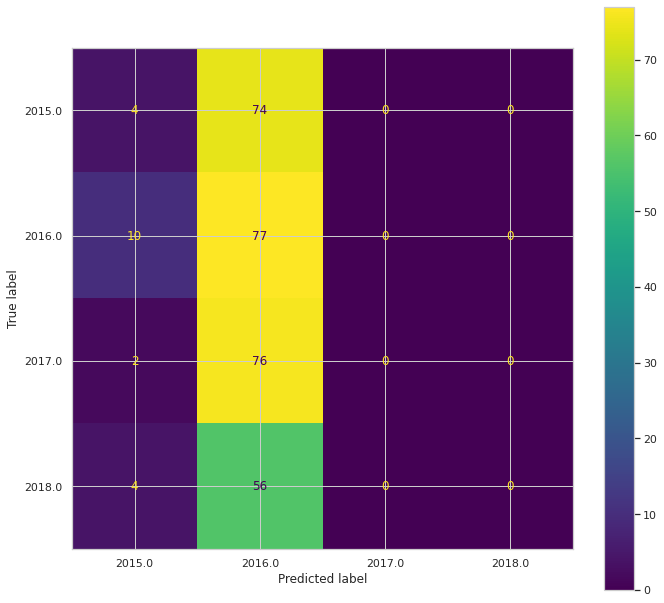

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_confusion_matrix(dt_tuned,scaled_test,y_test,ax=ax)



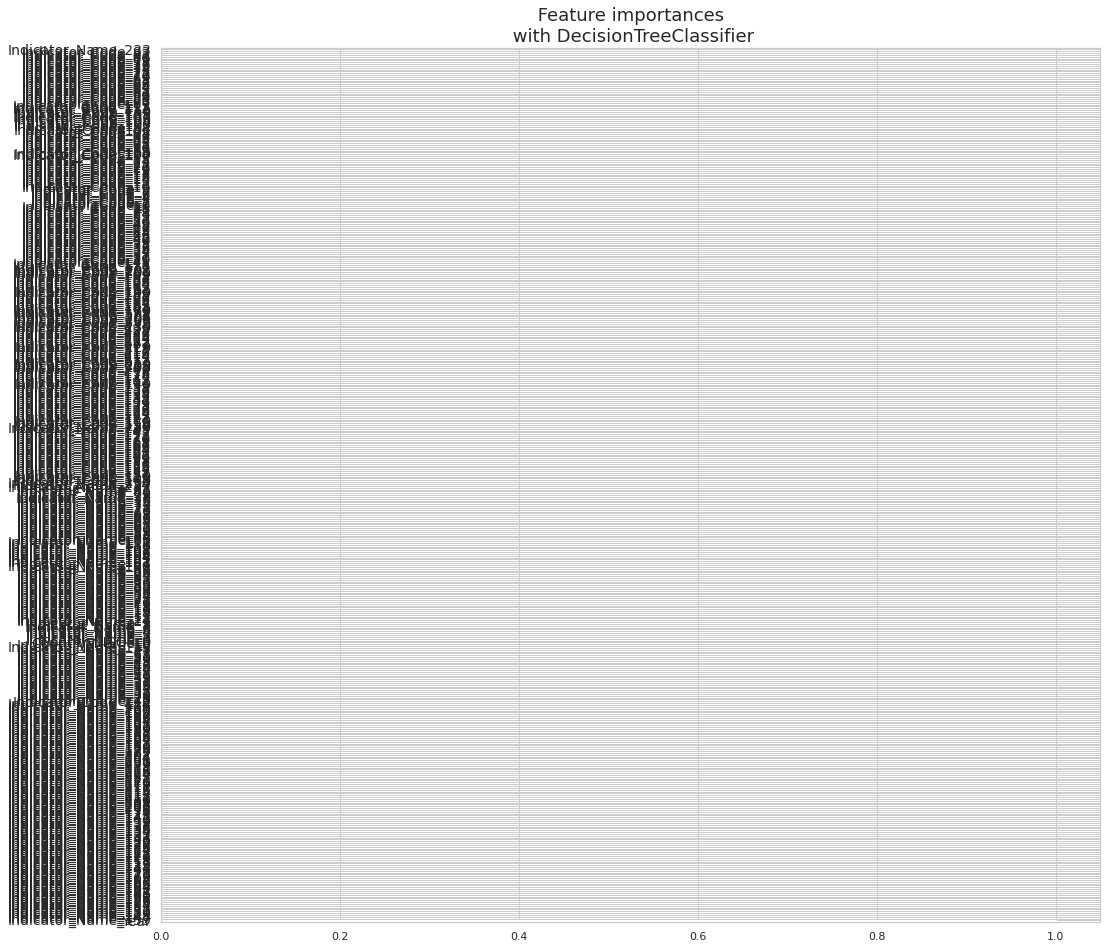

In [90]:
tree_model = dt_tuned.fit(scaled_train, y_train)
importances = tree_model.feature_importances_
feature_names = df.drop('Value', axis=1).columns
indices = np.argsort(importances)[::-1]
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(15,15))
    plt.title(" Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#fffb00',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
feature_importance_graph(indices, importances, feature_names)
plt.show()

In [91]:
y_scores = dt_tuned.predict_proba(scaled_train)

if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
    
#precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

In [92]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "g--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#1e81b0", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.58, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.58 \n threshold ', xy=(0.62, 0.80), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.5),
                fontsize=12, 
                color='k')
    plt.show()
    
#precision_recall_curve(precisions, recalls,threshold)

Text(0.5, 1.0, 'Precision and Recall Curve')

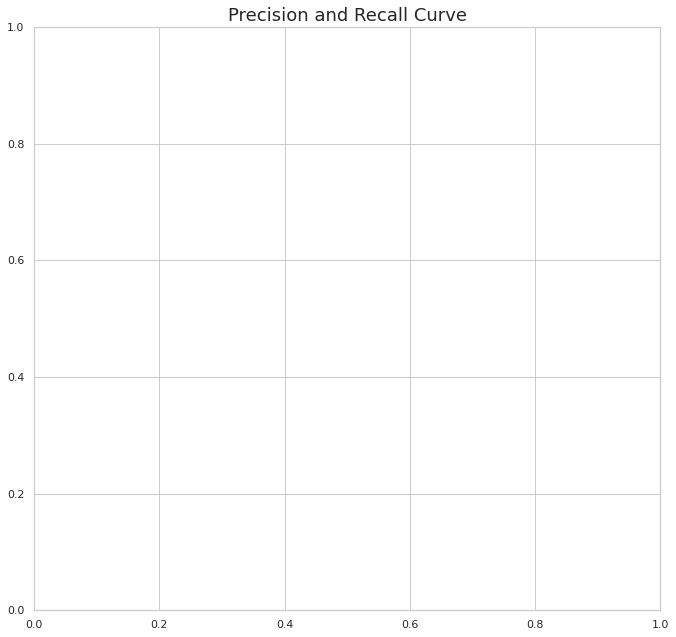

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Precision and Recall Curve", fontsize=18)
#plot_precision_recall_curve(dt_tuned,scaled_test,y_test,ax=ax)

Text(0.5, 1.0, 'ROC Curve')

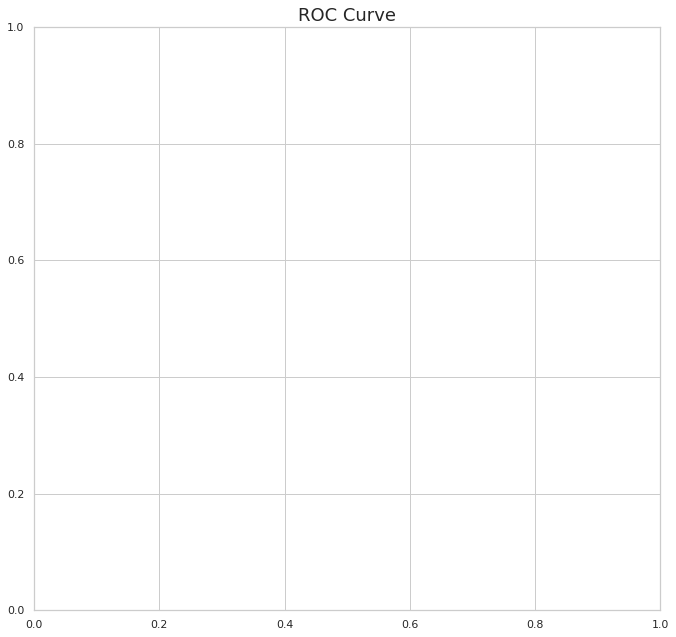

In [94]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("ROC Curve", fontsize=18)
#plot_roc_curve(dt_tuned,scaled_test,y_test,ax=ax)

In [95]:
text_representation = tree.export_text(tree_model)
print('\033[1m'+'\033[92m'+text_representation)

|--- feature_0 <= 0.27
|   |--- class: 2016.0
|--- feature_0 >  0.27
|   |--- class: 2015.0



In [96]:
fig = plt.figure(figsize=(150,150))
_ = tree.plot_tree(dt_tuned, feature_names=feature_names,class_names= ['yes','no'],filled=True)

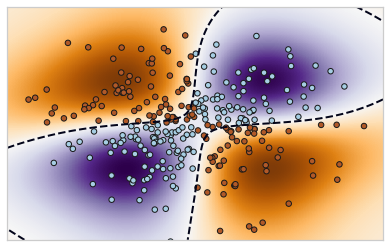

In [97]:
from sklearn import svm
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()



In [98]:
X = df.drop(['Year'], axis=1)
y = df[['Year']]
x

0        2018
1        2017
2        2016
3        2015
4        2014
         ... 
11340    1974
11341    1973
11342    1972
11343    1971
11344    1970
Name: Year, Length: 11345, dtype: int64

In [99]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=13)

In [100]:
rf = RandomForestClassifier(max_depth=10).fit(X_train, y_train)
predictions_rf = rf.predict(X_val)

In [101]:
acc_rf = accuracy_score(y_val, predictions_rf)
print('Accuracy Random Forest: %', 100 * acc_rf)

Accuracy Random Forest: % 32.846715328467155


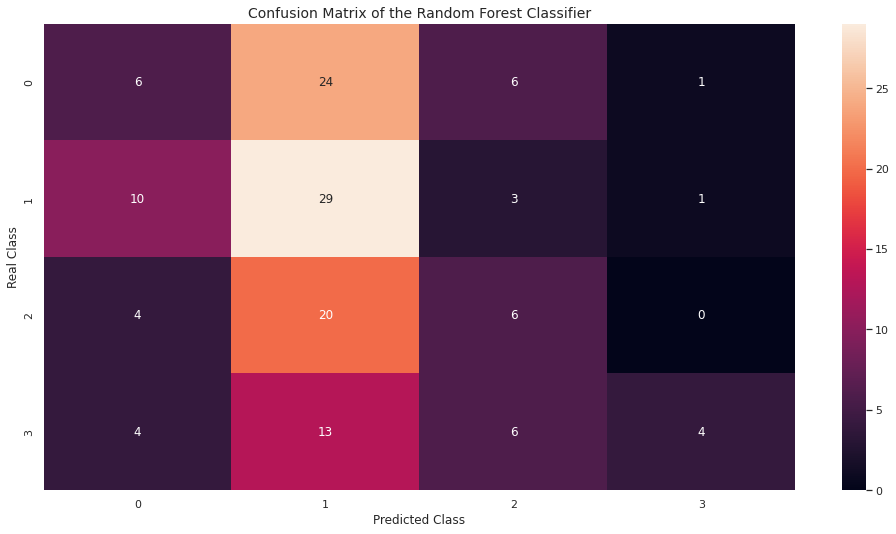

In [102]:
plt.figure(figsize=(15, 8))
conf_mat = confusion_matrix(y_true=y_val, y_pred=predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='g')
plt.title('Confusion Matrix of the Random Forest Classifier', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

In [103]:
X = df.drop(['Year'], axis=1)
y = df[['Year']]

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

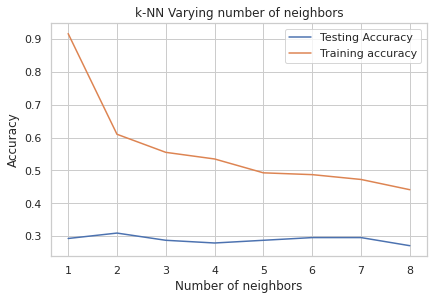

In [107]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [108]:
knn = KNeighborsClassifier(n_neighbors=7)

In [109]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [110]:
knn.score(X_test,y_test)

0.2958904109589041

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
y_pred = knn.predict(X_test)

In [113]:
confusion_matrix(y_test,y_pred)

array([[44, 28, 11, 11],
       [38, 36, 14, 16],
       [26, 27, 19, 17],
       [22, 24, 23,  9]])

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [116]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [117]:
knn_cv.best_score_

0.2908905302347925

In [118]:
knn_cv.best_params_

{'n_neighbors': 3}